# Notebook Imports and Packages

In [42]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression

%matplotlib inline

# Example 1 - A simple cost function

## $f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3,stop=3,num=500)

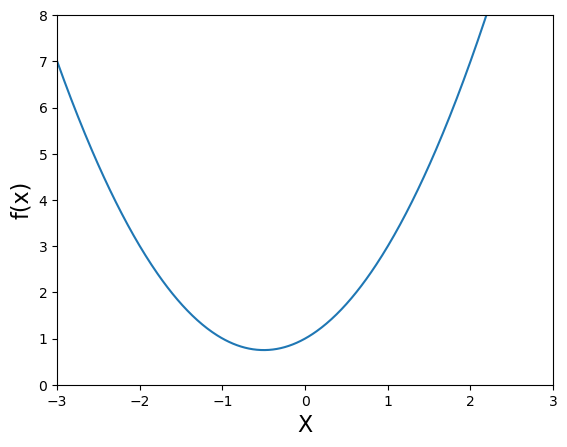

In [4]:
# Plot
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1));

## Slope & Derivatives

In [5]:
def df(x):
    return 2*x + 1

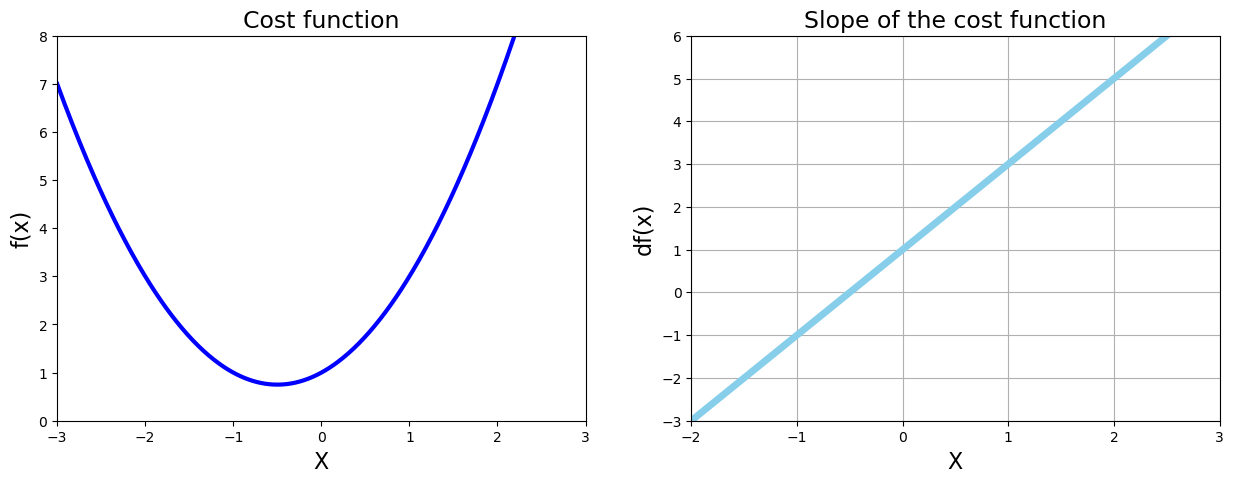

In [6]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-3,3])
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()

plt.xlim(-2,3)
plt.ylim(-3,6)

plt.plot(x_1,df(x_1), color='skyblue', linewidth=5);

## Python Loops & Gradient Descent

In [7]:
# Python For Loop
for n in range(5):
    print('Hello World', n)
print("End of loop")

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of loop


In [8]:
# Python while loop
counter = 1
while counter < 8:
    print('Counting...', counter)
    counter = counter + 1

Counting... 1
Counting... 2
Counting... 3
Counting... 4
Counting... 5
Counting... 6
Counting... 7


In [9]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    # print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times: ', n)
        break
    
print('Local minimum occurs at: ', new_x)
print('Slope or df(x) value at this point is: ', df(new_x))
print('f(x) value or cost at this point is: ', f(new_x))

Loop ran this many times:  50
Local minimum occurs at:  -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value or cost at this point is:  0.7500000015970362


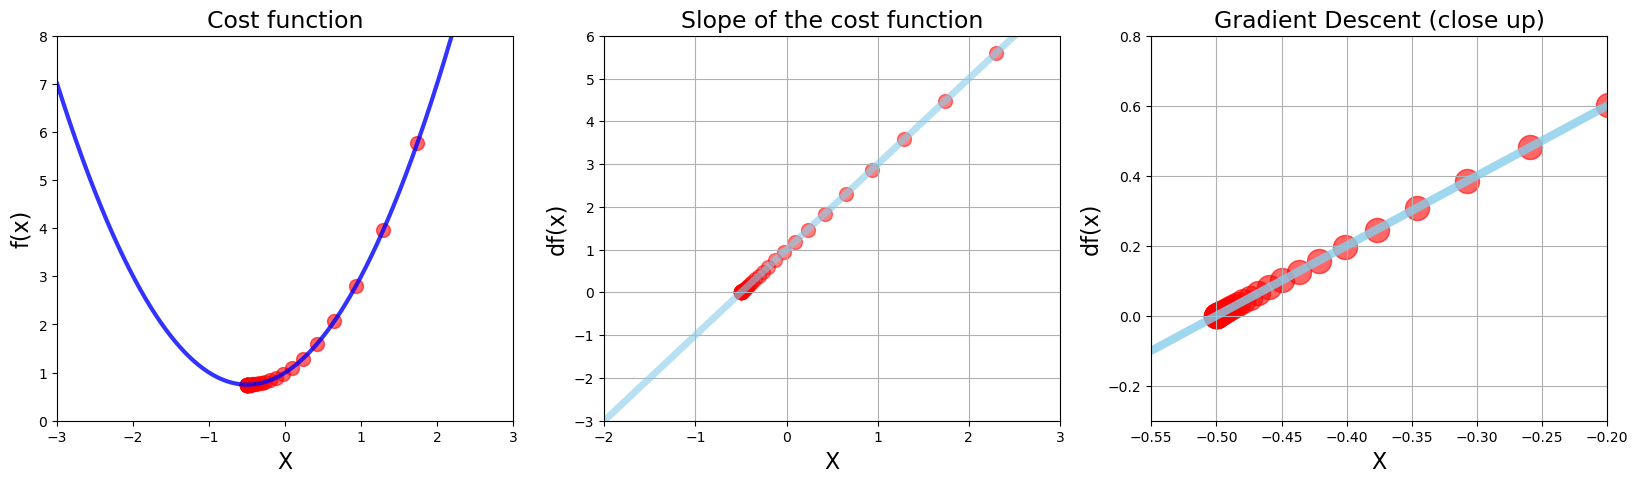

In [10]:
# Superimpose the gradient descent calculation on plot

plt.figure(figsize=[20,5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim([-3,3])
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

#2 Chart: Derivative
plt.subplot(1,3,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()

plt.xlim(-2,3)
plt.ylim(-3,6)

plt.plot(x_1,df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5);

#3 Chart: Derivative (Close Up)
plt.subplot(1,3,3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()

plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)

plt.plot(x_1,df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6);

# Example 2 - Multiple Minima va Initial Guess and Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [11]:
# Make Data
x_2 = np.linspace(start=-2,stop=2,num=1000)

In [12]:
def g(x):
    return x**4-4*x**2+5

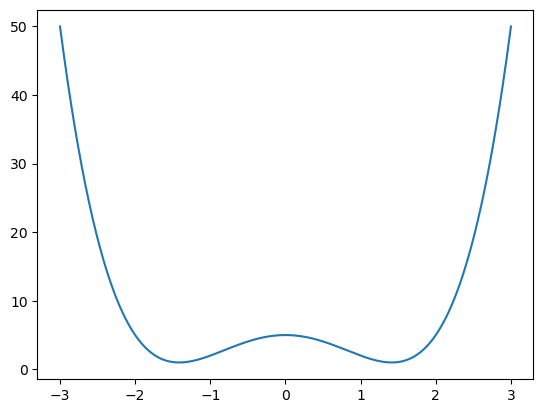

In [13]:
plt.plot(x_1, g(x_1));

In [14]:
def dg(x):
    return 4*x**3 - 8*x

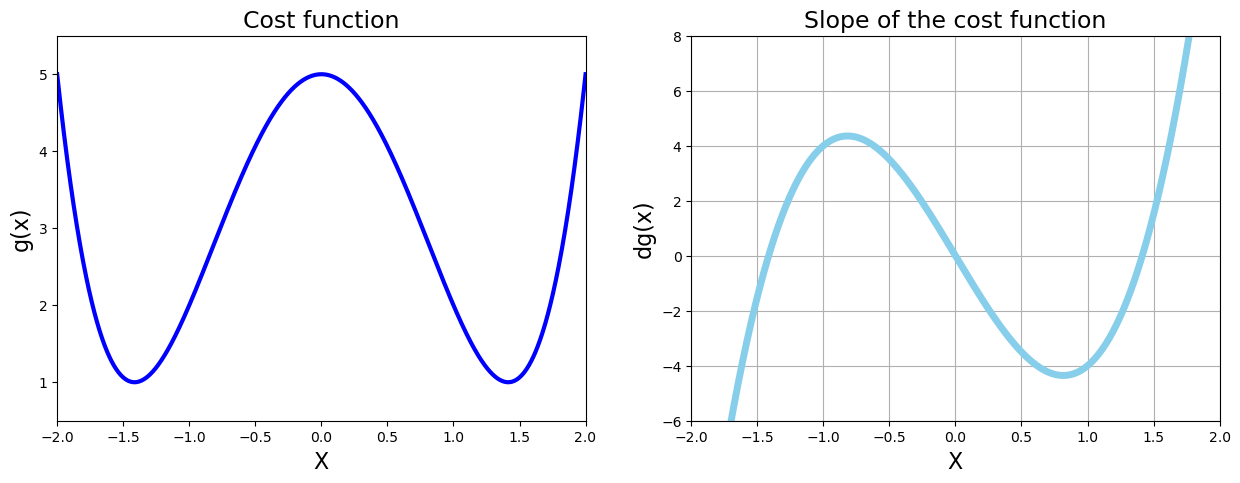

In [15]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-2,2])
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2,dg(x_2), color='skyblue', linewidth=5);

## Gradient Descent as a Python Function

In [16]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [17]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  1.4122375085019094
Number of steps:  23


In [18]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, 
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  -1.4137636556157256
Number of steps:  56


In [19]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  -1.4120887490901561
Number of steps:  34


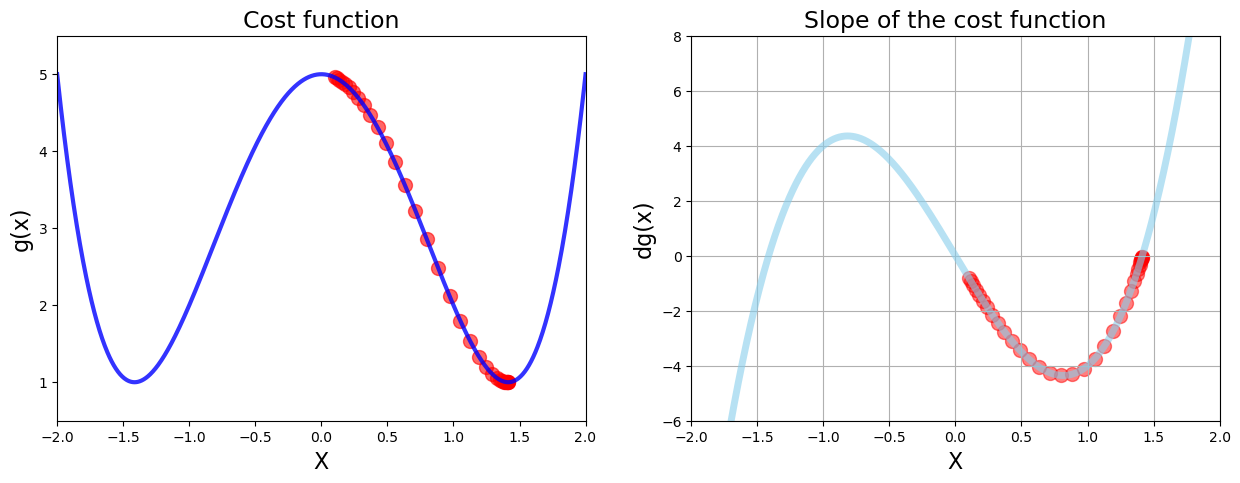

In [20]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.1)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-2,2])
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)), color='red', s=100, alpha=0.6)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2,dg(x_2), color='skyblue', linewidth=5, alpha=0.6);
plt.scatter(list_x,deriv_list, color='red', s=100, alpha=0.5);

# Example 3 - Divergence, Overflow and Python Tuples

## $$h(x) = x^5 - 2x^4 + 2$$

In [21]:
def h(x):
    return x**5 - 2*x**4 +2

def dh(x):
    return 5*x**4 - 8*x**3

In [22]:
# Make Data
x_3 = np.linspace(start=-2.5,stop=2.5,num=1000)

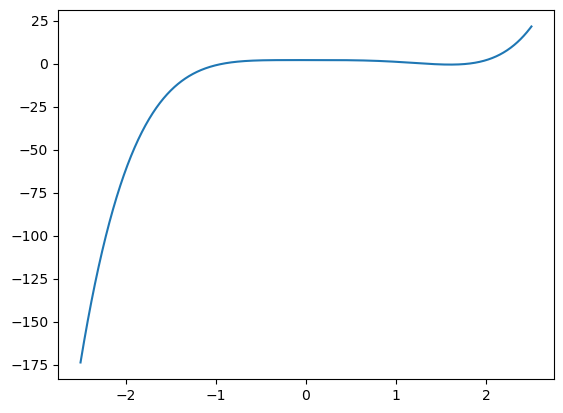

In [23]:
plt.plot(x_3,h(x_3));

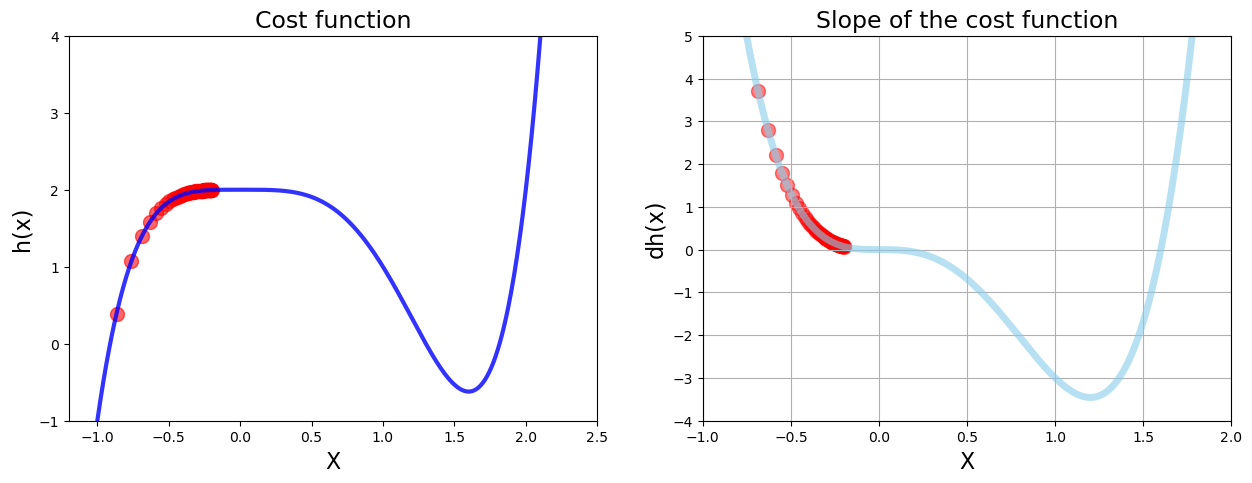

Local min occurs at:  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of steps:  72


In [24]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2,
                                                max_iter=71)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-1.2,2.5])
plt.ylim(-1,4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x,h(np.array(list_x)), color='red', s=100, alpha=0.6)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()

plt.xlim(-1,2)
plt.ylim(-4,5)

plt.plot(x_3,dh(x_3), color='skyblue', linewidth=5, alpha=0.6);
plt.scatter(list_x,deriv_list, color='red', s=100, alpha=0.5);

plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [25]:
import sys
# help(sys)
# sys.version
# type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [26]:
# Creating a tuple - tuple packing
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13,4,9,26,17

print('I loooove ', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')

not_my_address = 1, 'Infinit Loop', 'Cupertino', 95014

tuple_with_single_value = 42,
type(tuple_with_single_value)

main, side, greens = breakfast
print('Main course is', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps is', len(data_tuple[1]))

I loooove  bacon
My hotel has no 4th floor
Main course is bacon
Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Number of steps is 117


# The Learning Rate

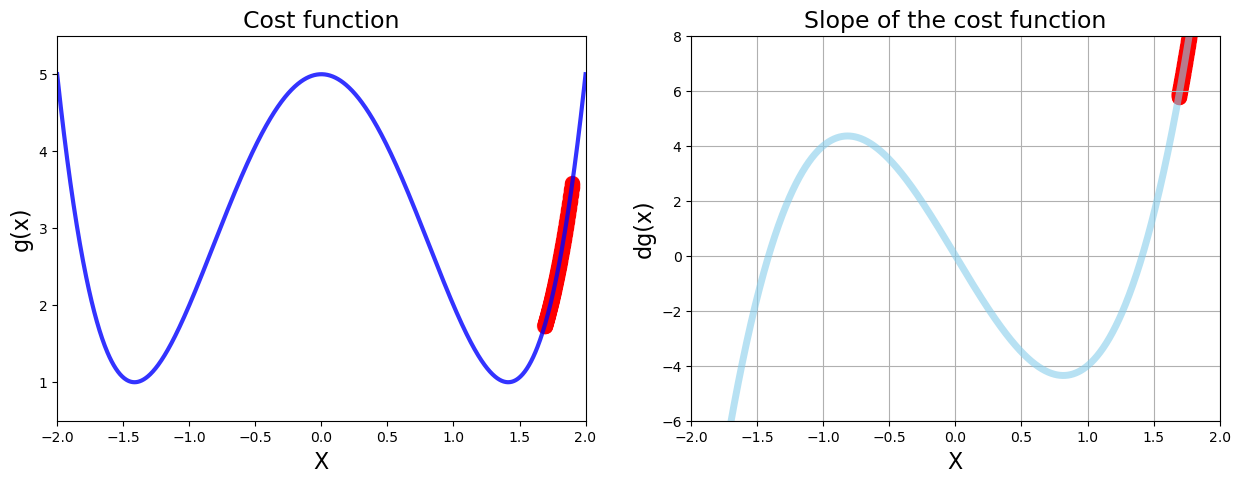

Number of steps is: 501


In [27]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, 
                                                 multiplier=0.00005, precision=0.0001, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-2,2])
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)), color='red', s=100, alpha=0.6)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2,dg(x_2), color='skyblue', linewidth=5, alpha=0.6);
plt.scatter(list_x,deriv_list, color='red', s=100, alpha=0.5);

plt.show()

print('Number of steps is:', len(list_x))

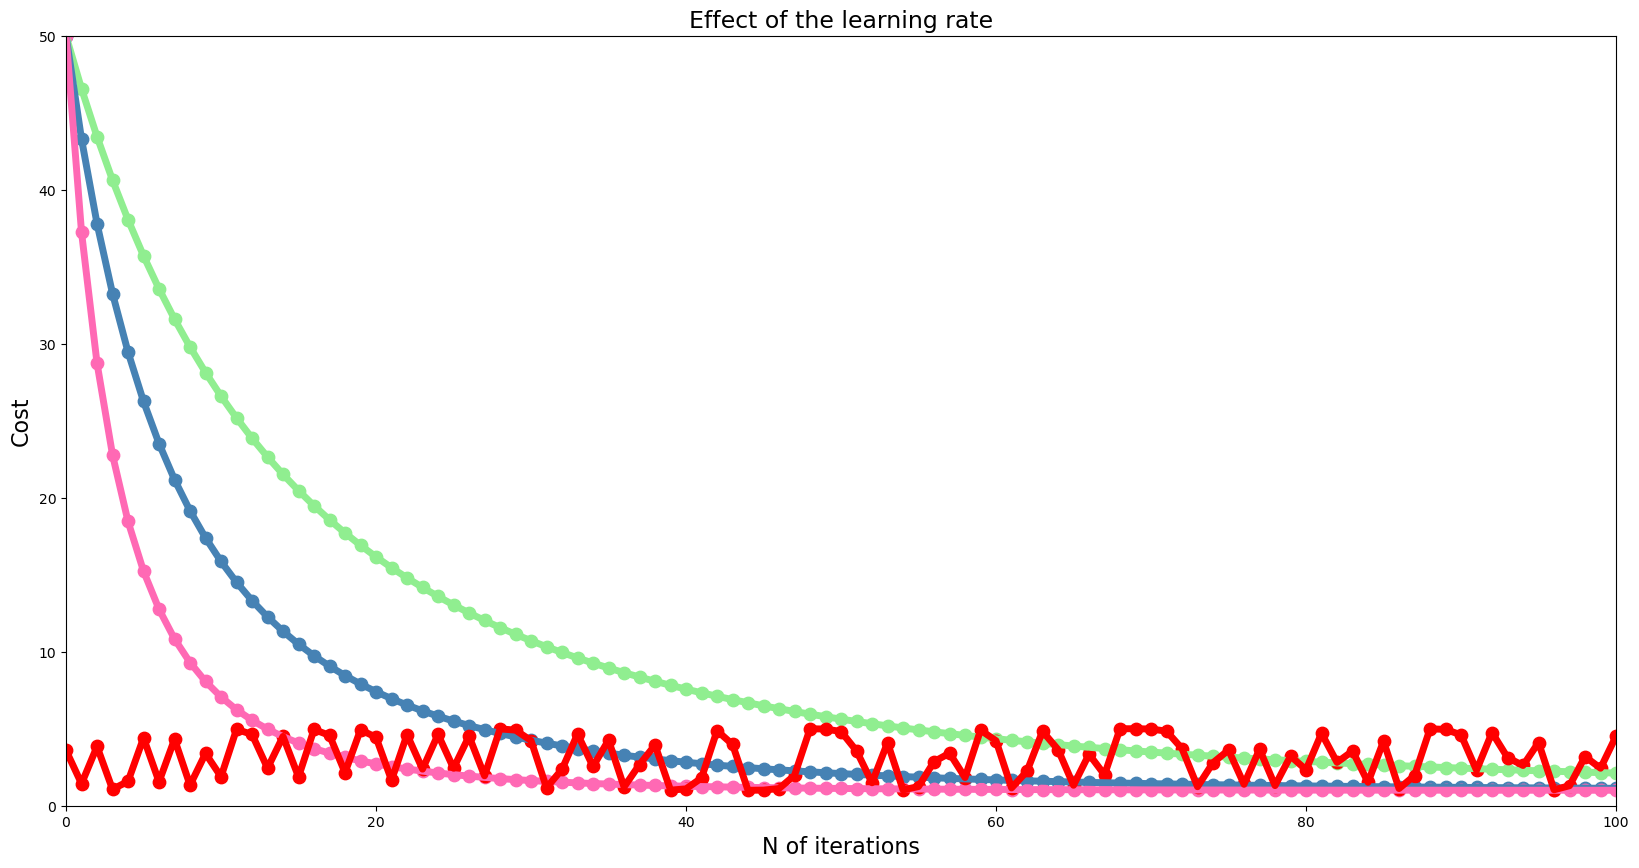

In [28]:
# Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                                                 multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                                                 multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                                                 multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                                 multiplier=0.25, precision=0.0001, max_iter=n)

# Ploting reduction in cost for each iteration
plt.figure(figsize=[20,10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('N of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list,g(low_values), color='lightgreen', s=80)

# Plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

# Plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

# Plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)

plt.show()


# Example 4 - Data Viz with 3D Charts

## Minimize $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimize $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [29]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [30]:
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Space of x array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid', x_4.shape)

Space of x array (200,)
Array after meshgrid (200, 200)


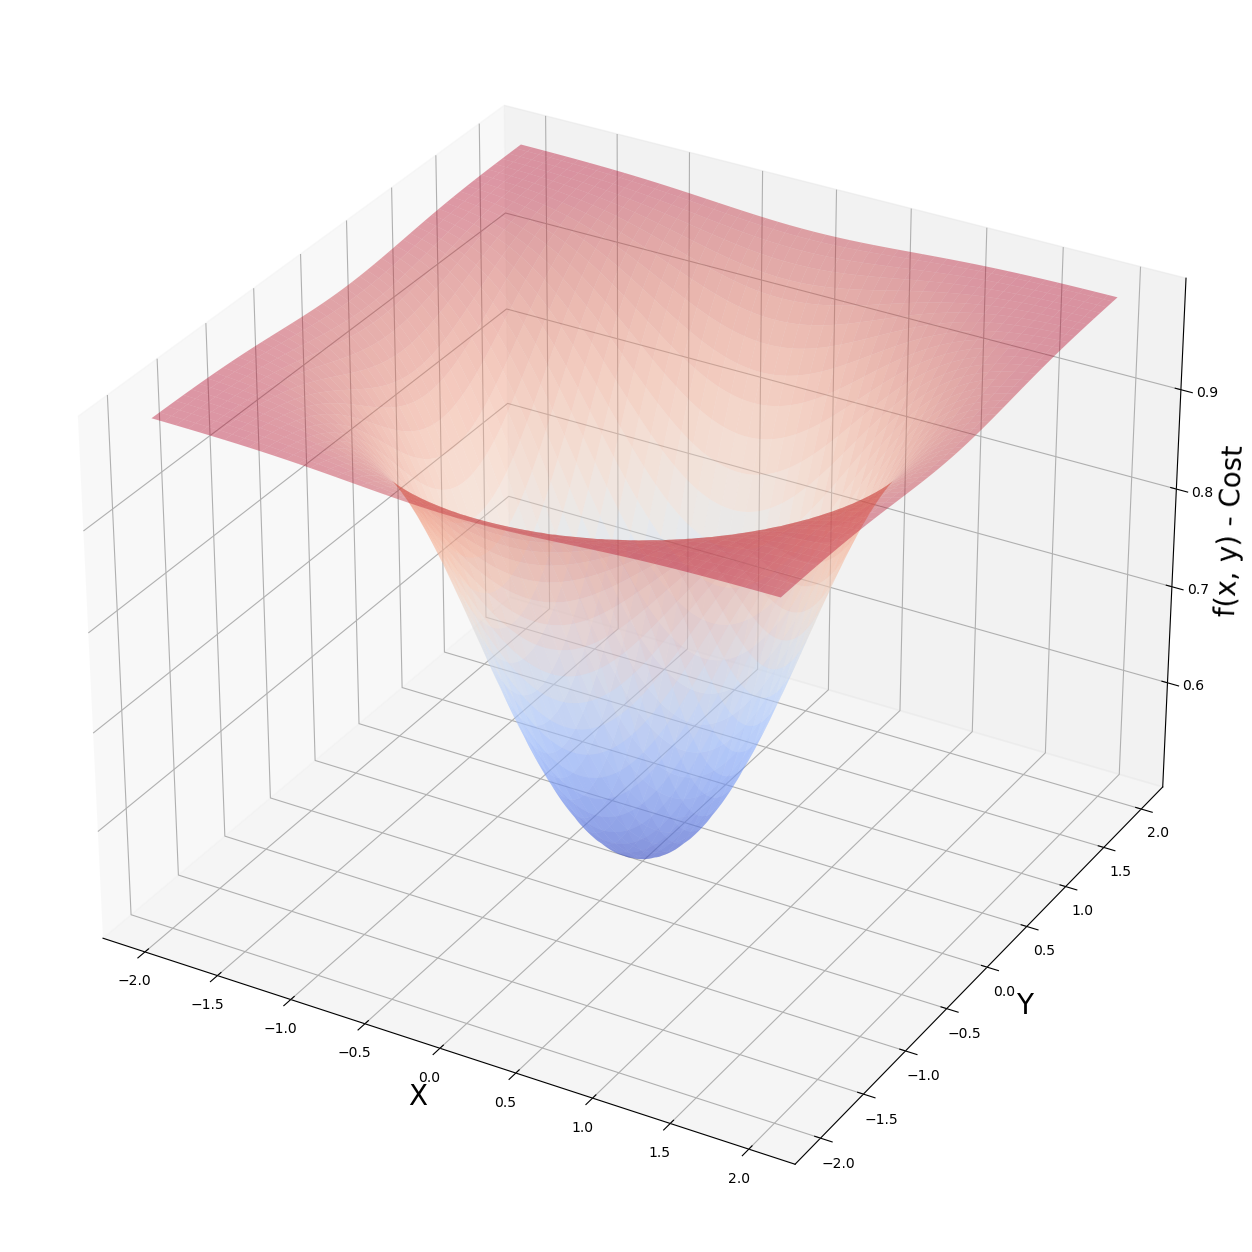

In [31]:
# Generating 3D Plot
fig = plt.figure(figsize=[20,16])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4);

## Partial Derivatives & Symbolic Computation 

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1 \right)^2}$$

## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1 \right)^2}$$

In [32]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is:', f(a, b))
print('Partial derivative with respect to x is:', diff(f(a,b), a))
print('Value of f(x,y) at x=1.8 y=1.0 is:', f(a,b).evalf(subs={a:1.8,b:1.0})) # Python Dictionary
print('Value of partial derivative with respect to x:', diff(f(a,b),a).evalf(subs={a:1.8,b:1.0}))

Our cost function f(x, y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derivative with respect to x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is: 0.990604794032582
Value of partial derivative with respect to x: 0.0368089716197505


## Batch Gradient Descent with SymPy

In [33]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results 
print('Values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occcurs at y value of:', params[1])
print('The cost is:', f(params[0],params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of: 3.45838599885832e-11
Minimum occcurs at y value of: 1.92132555492129e-11
The cost is: 0.500000000000000


In [34]:
# Partial Derivative funtions example 4
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [35]:
fpx(1.8, 1.0)

0.036808971619750504

In [36]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results 
print('Values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occcurs at y value of:', params[1])
print('The cost is:', f(params[0],params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occcurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


## Graphing 3D Gradient Descent & Advanced Numpy Arrays

In [37]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1,2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1,2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0)
    
# Results 
print('Values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occcurs at y value of:', params[1])
print('The cost is:', f(params[0],params[1]))

(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occcurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


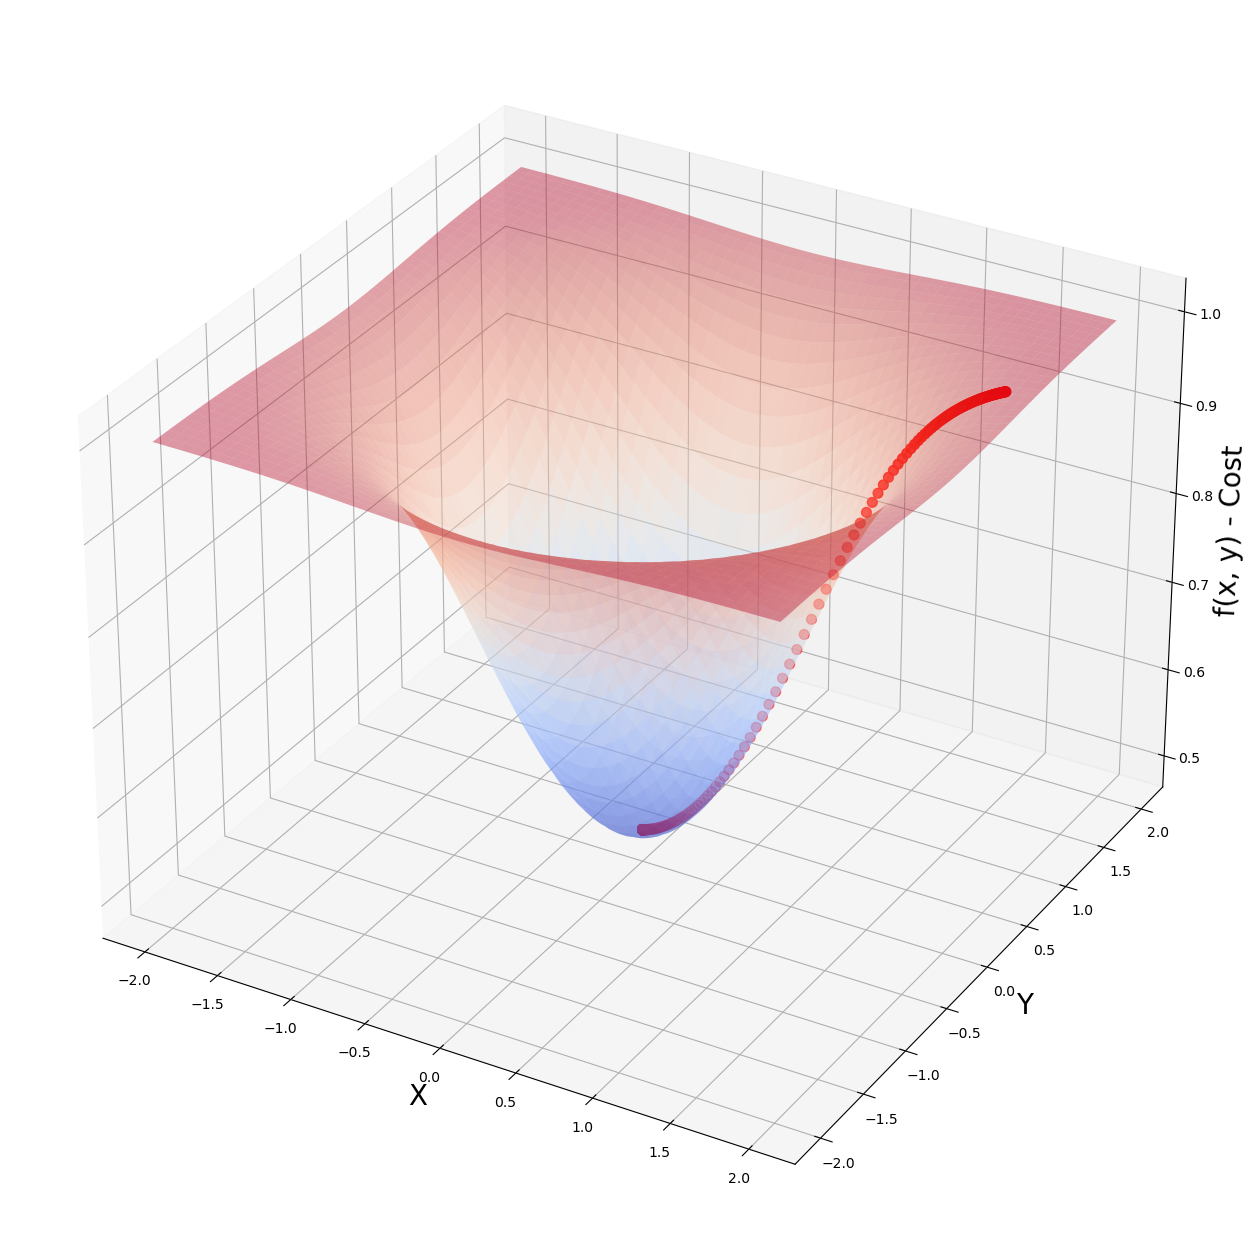

In [38]:
# Generating 3D Plot
fig = plt.figure(figsize=[20,16])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0],values_array[:,1],
           f(values_array[:,0],values_array[:,1]), s=50, color='red')

plt.show()

In [39]:
# Advanced Numpy Array Practice: 

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]', hs_band[0])
print('hs_band[1][0]', hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

print('Printing nichnames...', the_roots[:,0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles ...', the_roots[:,1])

(1, 2)
(2, 2)
hs_band[0] ['Black Thought' 'MC']
hs_band[1][0] Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nichnames... ['Black Thought' 'Questlove' 'Captain']
Printing band roles ... ['MC' 'Drums' 'Guitar' 'MC']


# Example 5 - Working with Data & a Real Cost Function
## MeanSquared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
## $$MSE =  \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
## $$MSE =  \frac{\sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2}{n}$$
## $$MSE =  \frac{\sum_{i=1}^{n} \big( y - \hat{y} \big)^2}{n}$$

In [53]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)

print('x_5:', x_5)
print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

# x_5 = x_5.reshape(-1,1)
# print('New shape for x_5:', x_5.shape)
# print('x_5:', x_5)

x_5: [[0.1]
 [1.2]
 [2.4]
 [3.2]
 [4.1]
 [5.7]
 [6.5]]
Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [55]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


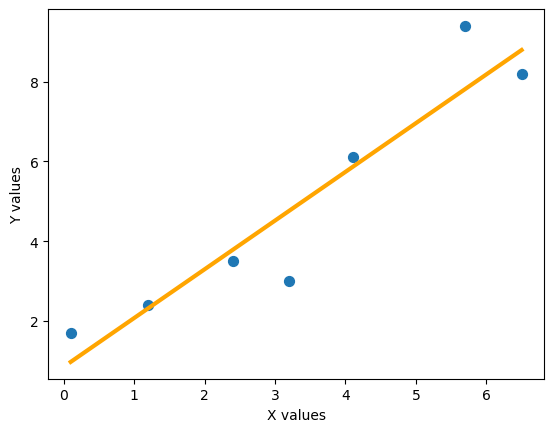

In [56]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()